Titanic dataset

origin: https://www.openml.org/search?type=data&id=40945

csv: https://hbiostat.org/data/repo/titanic3.csv

In [28]:
import pandas as pd
import numpy as np

data = pd.read_csv("titanic3.csv")
#print(data)

# Update missing data
Some dataset would use a placeholder for missing like "N/A" or "?".

For this example, we're replacing "New York, NY" as NaN (Not a Number).

In [7]:
print(data.loc[15])
data2 = data.replace("New York, NY", np.nan)
print(data2.loc[15])

pclass                         1
survived                       0
name         Baumann, Mr. John D
sex                         male
age                          NaN
sibsp                          0
parch                          0
ticket                  PC 17318
fare                      25.925
cabin                        NaN
embarked                       S
boat                         NaN
body                         NaN
home.dest           New York, NY
Name: 15, dtype: object
pclass                         1
survived                       0
name         Baumann, Mr. John D
sex                         male
age                          NaN
sibsp                          0
parch                          0
ticket                  PC 17318
fare                      25.925
cabin                        NaN
embarked                       S
boat                         NaN
body                         NaN
home.dest                    NaN
Name: 15, dtype: object


# Plot the data

<Axes: ylabel='Frequency'>

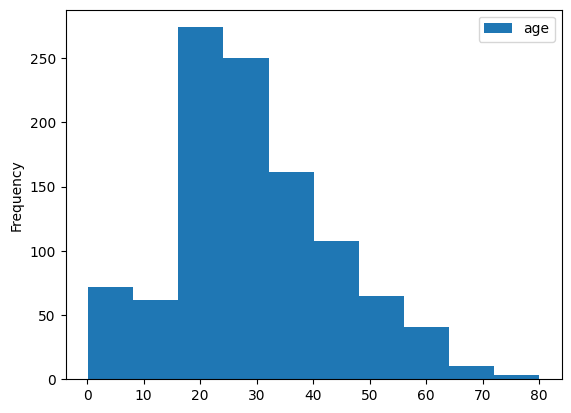

In [13]:
data.plot(x="survived", y="age", kind="hist")

# determining the number of survivals

In [16]:
total = len(data)
survived = data["survived"].sum()

print(f"There were {survived} survivals.")
print(f"Out of {total}, {total - survived} did not make it")

There were 500 survivals.
Out of 1309, 809 did not make it


# determining the number of male and female

In [18]:
total = len(data)
male_count = data["sex"].eq("male").sum()
female_count = data["sex"].eq("female").sum()
missing_sex = total - male_count - female_count

print(f"""There are {male_count} male,
{female_count} females,
{missing_sex} unrecorded/missing data""")

There are 843 male,
466 females,
0 unrecorded/missing data


# Find the unique cabins people have stayed in

In [20]:
unique_cabins = data["cabin"].unique()
print(unique_cabins)

unique_cabins_number = data["cabin"].nunique()
print(unique_cabins_number)

['B5' 'C22 C26' 'E12' 'D7' 'A36' 'C101' nan 'C62 C64' 'B35' 'A23'
 'B58 B60' 'D15' 'C6' 'D35' 'C148' 'C97' 'B49' 'C99' 'C52' 'T' 'A31' 'C7'
 'C103' 'D22' 'E33' 'A21' 'B10' 'B4' 'E40' 'B38' 'E24' 'B51 B53 B55'
 'B96 B98' 'C46' 'E31' 'E8' 'B61' 'B77' 'A9' 'C89' 'A14' 'E58' 'E49' 'E52'
 'E45' 'B22' 'B26' 'C85' 'E17' 'B71' 'B20' 'A34' 'C86' 'A16' 'A20' 'A18'
 'C54' 'C45' 'D20' 'A29' 'C95' 'E25' 'C111' 'C23 C25 C27' 'E36' 'D34'
 'D40' 'B39' 'B41' 'B102' 'C123' 'E63' 'C130' 'B86' 'C92' 'A5' 'C51' 'B42'
 'C91' 'C125' 'D10 D12' 'B82 B84' 'E50' 'D33' 'C83' 'B94' 'D49' 'D45'
 'B69' 'B11' 'E46' 'C39' 'B18' 'D11' 'C93' 'B28' 'C49' 'B52 B54 B56' 'E60'
 'C132' 'B37' 'D21' 'D19' 'C124' 'D17' 'B101' 'D28' 'D6' 'D9' 'B80' 'C106'
 'B79' 'C47' 'D30' 'C90' 'E38' 'C78' 'C30' 'C118' 'D36' 'D48' 'D47' 'C105'
 'B36' 'B30' 'D43' 'B24' 'C2' 'C65' 'B73' 'C104' 'C110' 'C50' 'B3' 'A24'
 'A32' 'A11' 'A10' 'B57 B59 B63 B66' 'C28' 'E44' 'A26' 'A6' 'A7' 'C31'
 'A19' 'B45' 'E34' 'B78' 'B50' 'C87' 'C116' 'C55 C57' 'D50'

# Finding the correlation between values

In [23]:
print(data.corr(numeric_only=True).abs()[["survived"]])
print(data.corr(numeric_only=True).abs()[["survived", "age"]])

          survived
pclass    0.312469
survived  1.000000
age       0.055512
sibsp     0.027825
parch     0.082660
fare      0.244265
body           NaN
          survived       age
pclass    0.312469  0.408106
survived  1.000000  0.055512
age       0.055512  1.000000
sibsp     0.027825  0.243699
parch     0.082660  0.150917
fare      0.244265  0.178740
body           NaN  0.058809


# Adding new column

In [92]:
data2 = data.copy()
data2.insert(4, "title", "")
#print(data2.head())

# if expand == False, data is returned as str
data2["title"] = (data2["name"].str.split(",", expand=False))
#print(data2.head())

# if expand == True, multiple columns is return per element
print(data2["name"].str.split(",", expand=True))

data2["title"] = (data2["name"]
    .str.split(",", expand=True)[1]
    .str.split(".", expand=True)[0]
)
data2 = data2.drop(columns=["name"])
print(data2.head())

              0                                        1
0         Allen                   Miss. Elisabeth Walton
1       Allison                    Master. Hudson Trevor
2       Allison                      Miss. Helen Loraine
3       Allison              Mr. Hudson Joshua Creighton
4       Allison   Mrs. Hudson J C (Bessie Waldo Daniels)
...         ...                                      ...
1304     Zabour                             Miss. Hileni
1305     Zabour                            Miss. Thamine
1306   Zakarian                          Mr. Mapriededer
1307   Zakarian                                Mr. Ortin
1308  Zimmerman                                  Mr. Leo

[1309 rows x 2 columns]
   pclass  survived     sex    title    age  sibsp  parch  ticket      fare  \
0       1         1  female     Miss  29.00      0      0   24160  211.3375   
1       1         1    male   Master   0.92      1      2  113781  151.5500   
2       1         0  female     Miss   2.00      1    

In [ ]:
print(data2["title"].unique())
print(data2["title"].value_counts().get(" the Countess"))

data2["title"] = data2["title"].replace(
    [" the Countess", " Lady", " Jonkheer"], "VIP"
)

correlation = data2[["title", "survived"]].groupby("title", as_index=False).mean()
print(correlation.sort_values("survived", ascending=False))

[' Miss' ' Master' ' Mr' ' Mrs' ' Col' ' Mme' ' Dr' ' Major' ' Capt'
 ' Lady' ' Sir' ' Mlle' ' Dona' ' Jonkheer' ' the Countess' ' Don' ' Rev'
 ' Ms']
1
      title  survived
3      Dona  1.000000
8      Mlle  1.000000
9       Mme  1.000000
14      Sir  1.000000
11      Mrs  0.786802
7      Miss  0.676923
15      VIP  0.666667
6    Master  0.508197
1       Col  0.500000
4        Dr  0.500000
5     Major  0.500000
12       Ms  0.500000
10       Mr  0.162483
0      Capt  0.000000
2       Don  0.000000
13      Rev  0.000000


# Visualizing the distribution between title and sex

In [70]:
print(pd.crosstab(data2["title"], data2["sex"]))

sex      female  male
title                
 Capt         0     1
 Col          0     4
 Don          0     1
 Dona         1     0
 Dr           1     7
 Major        0     2
 Master       0    61
 Miss       260     0
 Mlle         2     0
 Mme          1     0
 Mr           0   757
 Mrs        197     0
 Ms           2     0
 Rev          0     8
 Sir          0     1
VIP           2     1


# Describing the DataFrame

In [73]:
print(data2.describe(include="all"))

             pclass     survived   sex title          age        sibsp  \
count   1309.000000  1309.000000  1309  1309  1046.000000  1309.000000   
unique          NaN          NaN     2    16          NaN          NaN   
top             NaN          NaN  male    Mr          NaN          NaN   
freq            NaN          NaN   843   757          NaN          NaN   
mean       2.294882     0.381971   NaN   NaN    29.881138     0.498854   
std        0.837836     0.486055   NaN   NaN    14.413493     1.041658   
min        1.000000     0.000000   NaN   NaN     0.170000     0.000000   
25%        2.000000     0.000000   NaN   NaN    21.000000     0.000000   
50%        3.000000     0.000000   NaN   NaN    28.000000     0.000000   
75%        3.000000     1.000000   NaN   NaN    39.000000     1.000000   
max        3.000000     1.000000   NaN   NaN    80.000000     8.000000   

              parch    ticket         fare        cabin embarked boat  \
count   1309.000000      1309  1308.00

# Filling NA values

In [93]:
print(data2["age"][69])
data2["age"] = (data2["age"]
    .fillna(
        data2["age"].mean().astype(int)
    )
)
print(data2["age"][69])

nan
29.0
